# An introduction to the cluster analysis. Taking at first one cluster. 

# 1.0 Data input 

We are choosing the cluster NGC104 as Clare said.

In [1]:
from astropy.io import fits
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import seaborn as sn
import pickle
if("Analysis" in os.getcwd()):
    os.chdir("../")

from Data_handling.pca_functions import Pca_Fitting
from Data_handling.gaia_query import gaia_cone, bailer_jones_cone, concatenate_gaia_bailer
from Data_handling.vae import Encoder,Decoder, VAE , loss_function, model_train


os.chdir("Analysis")
os.getcwd()

'/Users/mattocallaghan/Documents/GES/Analysis'

# For selected parameters
Inputting the parameter file

In [2]:
os.chdir('../Parameter_files')
par=fits.open('GES_iDR6_WG15_Recommended_with_sflags__mode_normal_091221.fits')
indices=[1,2,3,4,5,6,7,8,15,16,18,19,23,24,25,29,31,32,36,37,38,42,43,45,87,88]
columns=[par[1].header['TTYPE'+str(i)] for i in indices]
data=np.array([par[1].data[x] for x in columns]).transpose()
data=pd.DataFrame(data=data,columns=columns)

In [3]:
par[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6914 / length of dimension 1                          
NAXIS2  =               114917 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  434 / number of table fields                         
EXTNAME = 'WGParametersWGAbundances' / Type of GES results in extension         
TTYPE1  = 'CNAME   '           / ESO object name (primary identifier)           
TFORM1  = '16A     '           / data format of field: ASCII Character          
TTYPE2  = 'CNAME_iDR6_orig'    / GES object name from coordinates (old)         
TFORM2  = '33A     '        

# Cluster choice

Choosing a good globular cluster

In [4]:
OC=data[data['GES_FLD']=='NGC104'].reset_index()


with open('data_gaia.txt', 'w') as f:
    for item in OC['GAIA_eDR3_ID'].astype(str).values:
        f.write("%s\n" % item)

# Parameter Names

In [5]:
OC

,index,CNAME,CNAME_iDR6_orig,GAIA_eDR3_ID,DIST_GAIA,GES_FLD,OBJECT,FILENAME,GES_TYPE,RA,...,FEH,E_FEH,SYS_ERR_FEH,XI,E_XI,VRAD,E_VRAD,VRAD_OFFSET,GAMMA,E_GAMMA
0,1794,00212293-7205029,00212293-7205029,4689618925875604224,0.1034,NGC104,50005964,gir_00212293-7205029_H548.8.fit|gir_00212293-7...,GE_SD_GC,5.345458333333242,...,-0.77,0.07,nan,nan,nan,-9.03,0.19,nan,nan,nan
1,1799,00213442-7208534,00213442-7208534,4689614837066802944,0.0999,NGC104,6808,,AR_SD_GC,5.393416666667,...,nan,nan,nan,nan,nan,-11.52,0.36,0.59,nan,nan
2,1800,00213645-7207194,00213645-7207194,4689617860723748864,0.1905,NGC104,50004171,gir_00213645-7207194_H548.8.fit|gir_00213645-7...,GE_SD_GC,5.402166666666576,...,-0.8,0.07,nan,nan,nan,-15.16,0.19,nan,nan,nan
3,1801,00213961-7202517,00213961-7202517,4689619338192422784,0.1358,NGC104,47TUC-00031830,gar_00213961-7202517_H665.0.fit,AR_SD_GC,5.415041666666576,...,-0.83,0.05,nan,nan,nan,-19.98,0.35,0.09,nan,nan
4,1802,00214371-7205162,00214371-7205162,4689618238680828800,0.0809,NGC104,104RGB002,gar_00214371-7205162_H665.0.fit,AR_SD_GC,5.432083333333241,...,-0.83,0.05,nan,nan,nan,-21.3,0.24,0.09,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2370,00262402-7206050,00262402-7206050,4689629714836034048,0.1416,NGC104,47TUC-00110197,gar_00262402-7206050_H665.0.fit,AR_SD_GC,6.600083333333222,...,-1.07,0.05,nan,nan,nan,-18.14,0.51,0.09,nan,nan
572,2371,00262629-7200544,00262629-7200544,4689633941083703424,0.1525,NGC104,10006039,gir_00262629-7200544_H548.8.fit|gir_00262629-7...,GE_SD_GC,6.609541666666554,...,-0.77,0.07,nan,nan,nan,-26.19,0.1,nan,nan,nan
573,2372,00262887-7204421,00262887-7204421,4689629779253913984,0.098,NGC104,80006963,gir_00262887-7204421_H548.8.fit|gir_00262887-7...,GE_SD_GC,6.620374999999888,...,-0.81,0.07,nan,nan,nan,-20.17,0.1,nan,nan,nan
574,2373,00263090-7208534,00263090-7208534,4689628615324452608,0.5541,NGC104,104EAGB12,gar_00263090-7208534_H665.0.fit,AR_SD_GC,6.628499999999889,...,0.21,0.05,nan,nan,nan,-38.92,0.24,0.09,nan,nan


# Gaia Data input

Select region by taking the mean declination and RA, look at the diameter by chooisng the maximal degree separation.

In [6]:
ra=OC['RA'].astype(float)
dec=OC['DEC'].astype(float)

In [7]:
radiusd=np.abs(dec.max()-dec.min())
radiusr=np.abs(ra.max()-ra.min())
radius=np.sqrt(radiusr**2+radiusd**2)

center=[ra.mean(),dec.mean()]

radius

1.3587861642947656

In [8]:
selection_region=gaia_cone(center[0],center[1],radius*0.5)


Launched query: '
                SELECT
                  
                  *,
                  DISTANCE(
                    POINT('ICRS', ra, dec),
                    POINT('ICRS', 6.0253899470450785, -72.07755733533718)
                  ) AS dist
                FROM
                  gaiaedr3.gaia_source
                WHERE
                  1 = CONTAINS(
                    POINT('ICRS', ra, dec),
                    CIRCLE('ICRS', 6.0253899470450785, -72.07755733533718, 0.6793930821473828)
                  )
                ORDER BY
                  dist ASC
                '
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Fri, 28 Jan 2022 15:49:29 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block

In [9]:
selection_region

,index,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist
0,0,1636042515805110273,Gaia EDR3 4688791813945943040,4688791813945943040,23613828,2016.0,7.147890,0.247370,-72.664950,0.217382,...,NaN,0,NaN,NaN,NaN,305.308865,-44.357707,310.537653,-62.943277,0.678645
1,3,1636042515805110273,Gaia EDR3 4688791848306581120,4688791848306581120,968503443,2016.0,7.208838,0.541013,-72.653583,0.549536,...,NaN,0,NaN,NaN,NaN,305.285608,-44.371226,310.579191,-62.953391,0.678456
2,4,1636042515805110273,Gaia EDR3 4688791852602998272,4688791852602998272,234334391,2016.0,7.248182,0.930633,-72.645517,1.058074,...,NaN,0,NaN,NaN,NaN,305.270694,-44.380665,310.607406,-62.959569,0.678102
3,5,1636042515805110273,Gaia EDR3 4688791951384914944,4688791951384914944,986103536,2016.0,7.293748,0.110047,-72.637513,0.099286,...,NaN,0,NaN,NaN,NaN,305.253171,-44.390259,310.637540,-62.967395,0.679175
4,7,1636042515805110273,Gaia EDR3 4688791955683935616,4688791955683935616,767126107,2016.0,7.263932,0.212816,-72.642452,0.182942,...,NaN,0,NaN,NaN,NaN,305.264691,-44.384279,310.618390,-62.962124,0.678183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146250,177634,1636042515805110273,Gaia EDR3 4690222278574931840,4690222278574931840,252314184,2016.0,7.162596,0.193388,-71.513759,0.180870,...,NaN,0,NaN,NaN,NaN,305.505715,-45.500441,312.696023,-62.358281,0.666373
146251,177635,1636042515805110273,Gaia EDR3 4690222278574933376,4690222278574933376,1097327369,2016.0,7.175437,0.199698,-71.509003,0.184709,...,NaN,0,NaN,NaN,NaN,305.500805,-45.505672,312.709359,-62.359245,0.672560
146252,177636,1636042515805110273,Gaia EDR3 4690222278575075584,4690222278575075584,1810029794,2016.0,7.151094,0.144388,-71.519842,0.138378,...,NaN,0,NaN,NaN,NaN,305.509780,-45.493946,312.680737,-62.358377,0.659281
146253,177637,1636042515805110273,Gaia EDR3 4690222278582393600,4690222278582393600,1544130498,2016.0,7.160599,0.371045,-71.512970,0.356587,...,NaN,0,NaN,NaN,NaN,305.506753,-45.501144,312.696753,-62.357328,0.666713


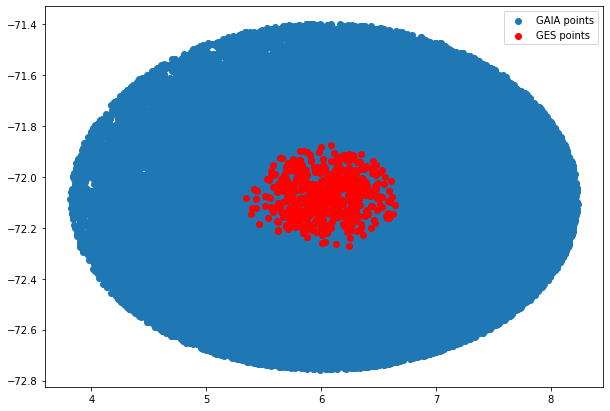

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(x=selection_region['ra'],y=selection_region['dec'],label='GAIA points')
plt.scatter(x=ra,y=dec,color='red',label='GES points')
plt.legend()



In [11]:
OC['GAIA_eDR3_ID'].astype(int)



0      4689618925875604224
1      4689614837066802944
2      4689617860723748864
3      4689619338192422784
4      4689618238680828800
              ...         
571    4689629714836034048
572    4689633941083703424
573    4689629779253913984
574    4689628615324452608
575    4689629474317872256
Name: GAIA_eDR3_ID, Length: 576, dtype: int64

In [21]:
OC['GAIA_eDR3_ID']=OC['GAIA_eDR3_ID'].astype(int)

In [22]:
selection_region['GAIA_eDR3_ID']=selection_region['source_id']

In [25]:
gaia_df_oc=selection_region[selection_region['GAIA_eDR3_ID'].isin(OC['GAIA_eDR3_ID'].astype(int).values)]


In [35]:
globular_cluster_data=pd.DataFrame.merge(OC, gaia_df_oc,on='GAIA_eDR3_ID')
globular_cluster_data.columns[0:90]


Index(['level_0', 'index_x', 'CNAME', 'CNAME_iDR6_orig', 'GAIA_eDR3_ID',
       'DIST_GAIA', 'GES_FLD', 'OBJECT', 'FILENAME', 'GES_TYPE', 'RA', 'DEC',
       'TEFF', 'E_TEFF', 'SYS_ERR_TEFF', 'LOGG', 'E_LOGG', 'SYS_ERR_LOGG',
       'FEH', 'E_FEH', 'SYS_ERR_FEH', 'XI', 'E_XI', 'VRAD', 'E_VRAD',
       'VRAD_OFFSET', 'GAMMA', 'E_GAMMA', 'index_y', 'solution_id',
       'designation', 'source_id', 'random_index', 'ref_epoch', 'ra',
       'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       

# Plotting

Text(0.5, 1.0, 'bp_rp histogram plot')

<Figure size 1080x720 with 0 Axes>

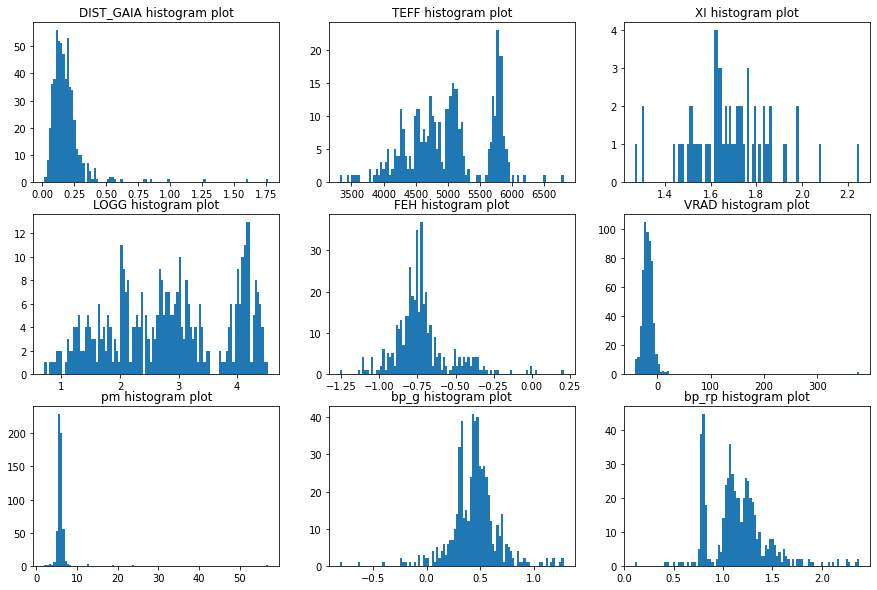

In [48]:

par=['DIST_GAIA','TEFF', 'LOGG', 'FEH', 'VRAD', 'XI','pm','bp_g','bp_rp','g_rp']
plt.figure(figsize=(15,10))
globular_cluster_data[par]=globular_cluster_data[par].astype(float)
fig, axs = plt.subplots(3, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
axs[0, 0].hist(globular_cluster_data[par[0]].astype(float),bins=100)
axs[0, 0].set_title(par[0] + ' histogram plot')
axs[0, 1].hist(globular_cluster_data[par[1]].astype(float),bins=100)
axs[0, 1].set_title(par[1] + ' histogram plot')
axs[1, 0].hist(globular_cluster_data[par[2]].astype(float),bins=100)
axs[1, 0].set_title(par[2] + ' histogram plot')
axs[1, 1].hist(globular_cluster_data[par[3]].astype(float),bins=100)
axs[1, 1].set_title(par[3] + ' histogram plot')
axs[1, 2].hist(globular_cluster_data[par[4]].astype(float),bins=100)
axs[1, 2].set_title(par[4] + ' histogram plot')
axs[0, 2].hist(globular_cluster_data[par[5]].dropna().astype(float),bins=100)
axs[0, 2].set_title(par[5] + ' histogram plot')


axs[2, 0].hist(globular_cluster_data[par[6]].astype(float),bins=100)
axs[2, 0].set_title(par[6] + ' histogram plot')
axs[2, 1].hist(globular_cluster_data[par[7]].astype(float),bins=100)
axs[2, 1].set_title(par[7] + ' histogram plot')
axs[2, 2].hist(globular_cluster_data[par[8]].astype(float),bins=100)
axs[2, 2].set_title(par[8] + ' histogram plot')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

# Density plot of different parameters

(-2.0, 10.0)

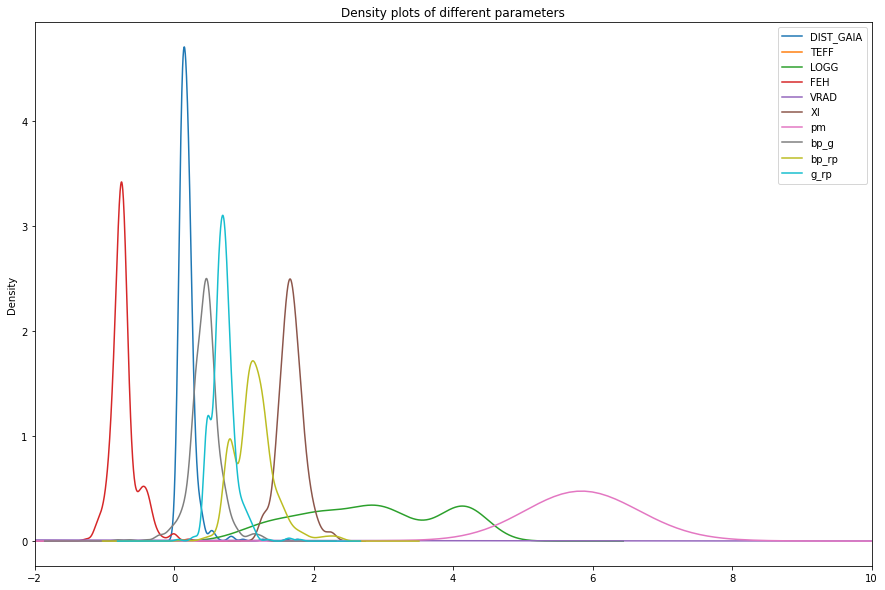

In [52]:
par=['DIST_GAIA','TEFF', 'LOGG', 'FEH', 'VRAD', 'XI','pm','bp_g','bp_rp','g_rp']
globular_cluster_data[par].plot.kde(figsize=(15,10),title='Density plots of different parameters')
plt.xlim(-2,10)

GAIA Parameters

(-2.0, 10.0)

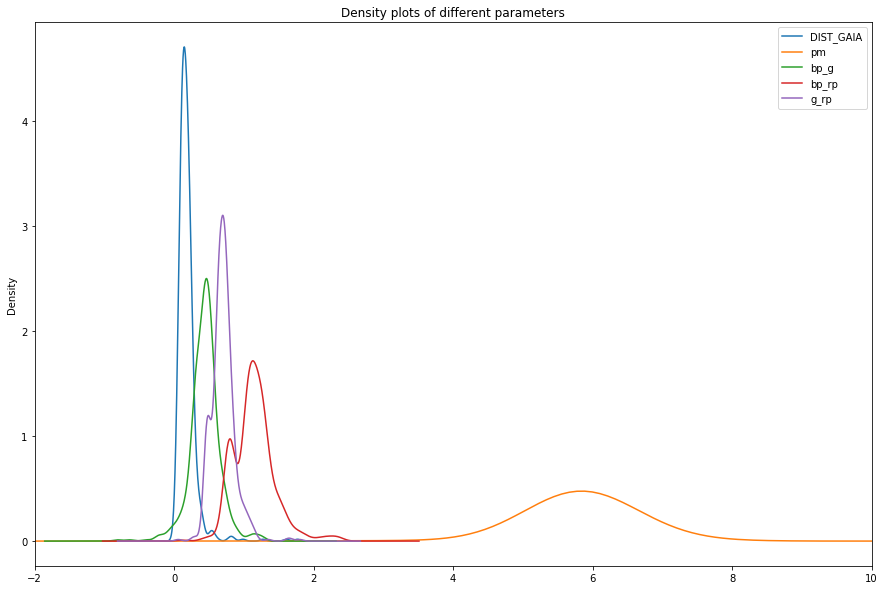

In [53]:
par=['DIST_GAIA','pm','bp_g','bp_rp','g_rp']
globular_cluster_data[par].plot.kde(figsize=(15,10),title='Density plots of different GAIA parameters')
plt.xlim(-2,10)

GES Parameters

(-2.0, 10.0)

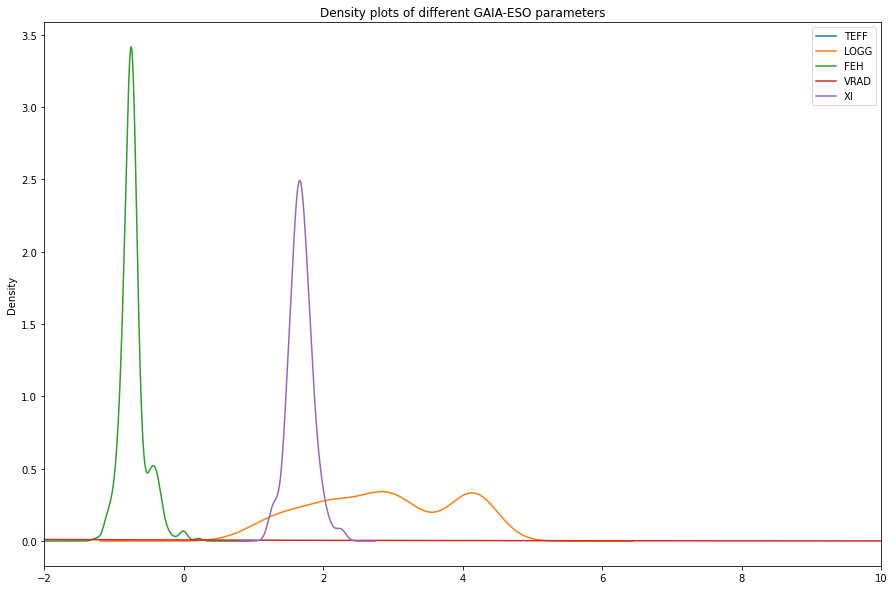

In [60]:
par=['TEFF', 'LOGG', 'FEH', 'VRAD', 'XI']
globular_cluster_data[par].plot.kde(figsize=(15,10),title='Density plots of different GAIA-ESO parameters')
plt.xlim(-2,10)

<AxesSubplot:title={'center':'Density plots of VRAD parameters'}, ylabel='Density'>

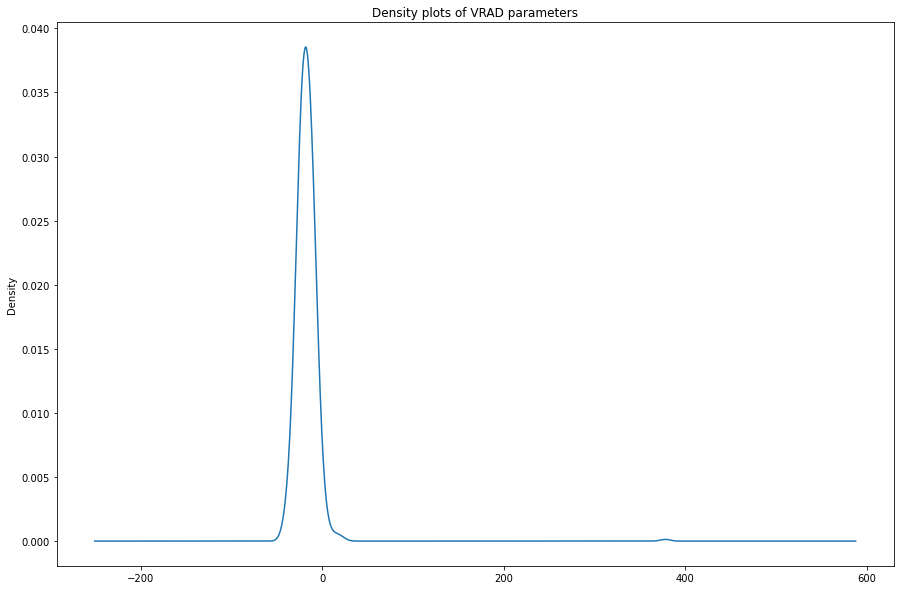

In [63]:
par='VRAD'
globular_cluster_data[par].plot.kde(figsize=(15,10),title='Density plots of VRAD parameters')


# Gaussian Fit for each component

Text(0.5, 1.0, 'bp_rp gaussian fit')

<Figure size 1080x720 with 0 Axes>

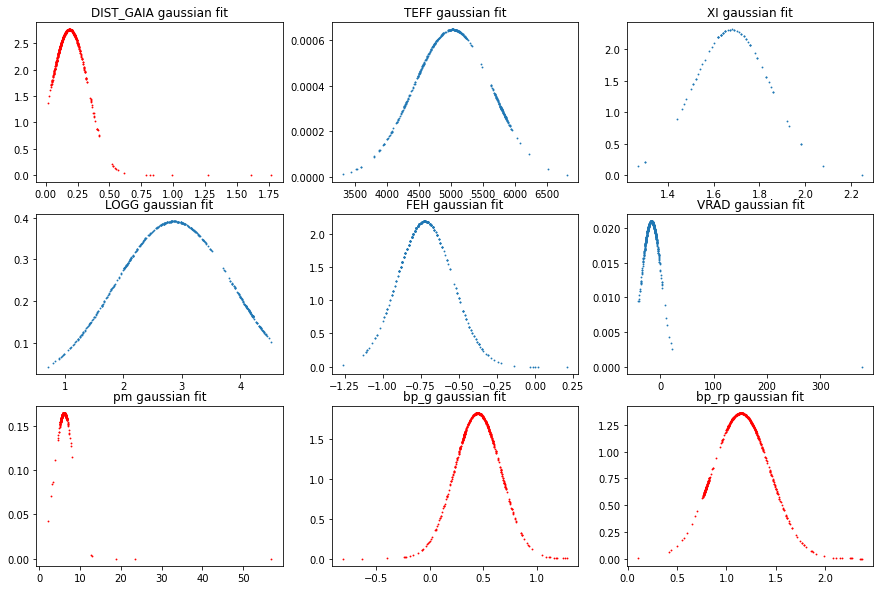

In [197]:
from scipy.stats import multivariate_normal

par=['DIST_GAIA','TEFF', 'LOGG', 'FEH', 'VRAD', 'XI','pm','bp_g','bp_rp','g_rp']
plt.figure(figsize=(15,10))

def plot_data(gaia_par):
    learning_data=globular_cluster_data[gaia_par].dropna().to_numpy()
    cov=np.cov(learning_data.transpose())

    mean=np.mean(learning_data,axis=0)

    y = multivariate_normal.pdf(learning_data, mean=mean, cov=cov)
    return learning_data , y


fig, axs = plt.subplots(3, 3)
fig.set_figwidth(15)
fig.set_figheight(10)

x,y=plot_data(par[0])
axs[0, 0].scatter(x=x,y=y,s=0.7,color='r')
axs[0, 0].set_title(par[0] + ' gaussian fit')

x,y=plot_data(par[1])
axs[0, 1].scatter(x=x,y=y,s=0.7)
axs[0, 1].set_title(par[1] + ' gaussian fit')

x,y=plot_data(par[2])
axs[1, 0].scatter(x=x,y=y,s=0.7)
axs[1, 0].set_title(par[2] + ' gaussian fit')

x,y=plot_data(par[3])
axs[1, 1].scatter(x=x,y=y,s=0.7)
axs[1, 1].set_title(par[3] + ' gaussian fit')

x,y=plot_data(par[4])
axs[1, 2].scatter(x=x,y=y,s=0.7)
axs[1, 2].set_title(par[4] + ' gaussian fit')

x,y=plot_data(par[5])
axs[0, 2].scatter(x=x,y=y,s=0.7)
axs[0, 2].set_title(par[5] + ' gaussian fit')


x,y=plot_data(par[6])
axs[2, 0].scatter(x=x,y=y,s=0.7,color='r')
axs[2, 0].set_title(par[6] + ' gaussian fit')

x,y=plot_data(par[7])
axs[2, 1].scatter(x=x,y=y,s=0.7,color='r')
axs[2, 1].set_title(par[7] + ' gaussian fit')

x,y=plot_data(par[8])
axs[2, 2].scatter(x=x,y=y,s=0.7,color='r')
axs[2, 2].set_title(par[8] + ' gaussian fit')

# Cumultive Dist Function

Text(0.5, 1.0, 'bp_rp gaussian fit')

<Figure size 1080x720 with 0 Axes>

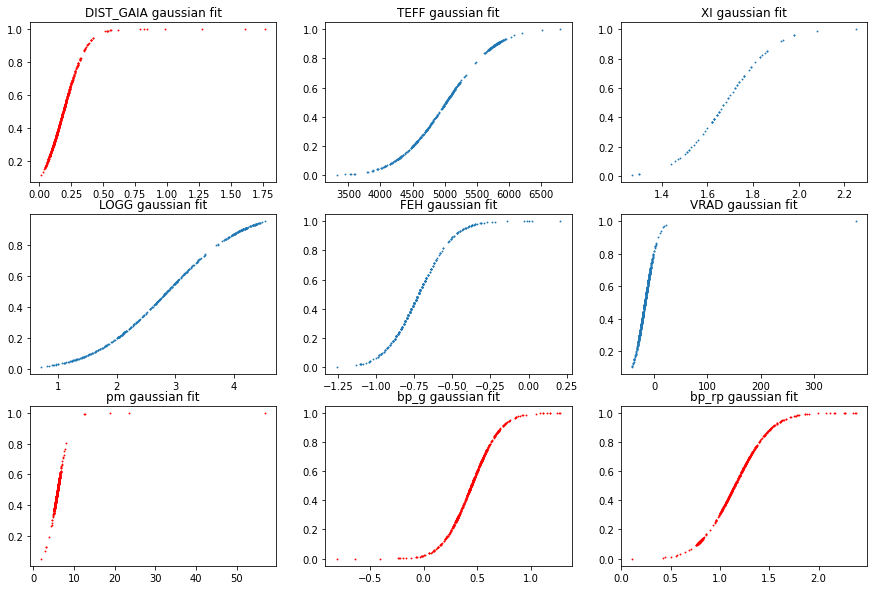

In [231]:
from scipy.stats import multivariate_normal

par=['DIST_GAIA','TEFF', 'LOGG', 'FEH', 'VRAD', 'XI','pm','bp_g','bp_rp','g_rp']
plt.figure(figsize=(15,10))

def plot_data(gaia_par):
    learning_data=globular_cluster_data[gaia_par].dropna().to_numpy()
    cov=np.cov(learning_data.transpose())

    mean=np.mean(learning_data,axis=0)

    y = multivariate_normal.cdf(learning_data, mean=mean, cov=cov)
    return learning_data , y


fig, axs = plt.subplots(3, 3)
fig.set_figwidth(15)
fig.set_figheight(10)

x,y=plot_data(par[0])
axs[0, 0].scatter(x=x,y=y,s=0.7,color='r')
axs[0, 0].set_title(par[0] + ' gaussian fit')

x,y=plot_data(par[1])
axs[0, 1].scatter(x=x,y=y,s=0.7)
axs[0, 1].set_title(par[1] + ' gaussian fit')

x,y=plot_data(par[2])
axs[1, 0].scatter(x=x,y=y,s=0.7)
axs[1, 0].set_title(par[2] + ' gaussian fit')

x,y=plot_data(par[3])
axs[1, 1].scatter(x=x,y=y,s=0.7)
axs[1, 1].set_title(par[3] + ' gaussian fit')

x,y=plot_data(par[4])
axs[1, 2].scatter(x=x,y=y,s=0.7)
axs[1, 2].set_title(par[4] + ' gaussian fit')

x,y=plot_data(par[5])
axs[0, 2].scatter(x=x,y=y,s=0.7)
axs[0, 2].set_title(par[5] + ' gaussian fit')


x,y=plot_data(par[6])
axs[2, 0].scatter(x=x,y=y,s=0.7,color='r')
axs[2, 0].set_title(par[6] + ' gaussian fit')

x,y=plot_data(par[7])
axs[2, 1].scatter(x=x,y=y,s=0.7,color='r')
axs[2, 1].set_title(par[7] + ' gaussian fit')

x,y=plot_data(par[8])
axs[2, 2].scatter(x=x,y=y,s=0.7,color='r')
axs[2, 2].set_title(par[8] + ' gaussian fit')

# Joint Gaussians

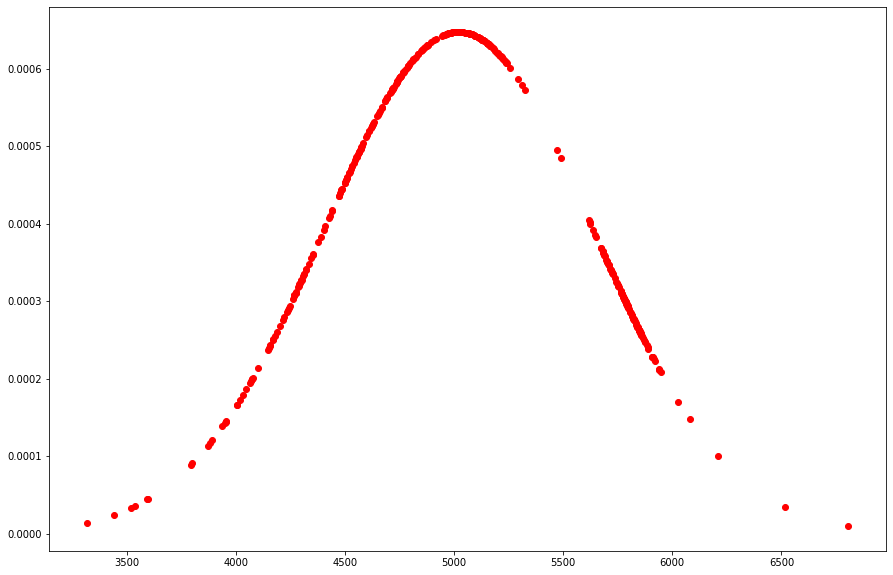

In [226]:
from scipy.stats import multivariate_normal

par=['DIST_GAIA','TEFF', 'LOGG', 'FEH', 'VRAD', 'XI','pm','bp_g','bp_rp','g_rp']
plt.figure(figsize=(15,10))

def plot_data(gaia_par):
    learning_data=globular_cluster_data[gaia_par].dropna().to_numpy()
    cov=np.cov(learning_data.transpose())

    mean=np.mean(learning_data,axis=0)

    y = multivariate_normal.pdf(learning_data, mean=mean, cov=cov)
    return learning_data , y

x,y=plot_data(par[1:2])

plt.scatter(x=x.transpose()[0],y=y,color='r')



# 3.0 Cross matching 

The parameter file already has cross matching with GAIA.